In [54]:
import pandas as pd
import geopandas as gpd

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

PATH_PROJECT = "/home/yoshraf/projects/mestrado/"
pd.options.display.max_columns = None

df = gpd.read_parquet(f"{PATH_PROJECT}data/processed/dataset.parque")

/home/yoshraf/projects/mestrado/venv/lib/python3.8/site-packages/geopandas/io/arrow.py:352: UserWarning: Multiple non-primary geometry columns read from Parquet/Feather file. The first column read was promoted to the primary geometry.
  warnings.warn(


In [14]:
import sys
sys.path.insert(0, "/home/yoshraf/projects/mestrado/project")

from src.utils import nearest_point_value, get_distance, get_counting, prep_ciclo_shp, geo_prep_to_join
from shapely.ops import nearest_points, unary_union
import time

In [11]:
df.head()

,Zona de domicílio,Município do domicílio,Identifica domicílo,Data da entrevista,Tipo de domicílio,Possui água encanada?,A rua é pavimentada?,Total de famílias no domicílio,Total de moradores na família,Condição de moradia,Quantidade de banheiros,Quantidade de empregados domésticos,Quantidade de automóveis,Quantidade de motocicletas,Quantidade de bicicletas,Critério de Classificação Econônica Brasil,Pontos Critério Brasil,Renda familiar mensal,Identifica pessoa,Situação familiar,Idade,Gênero,Estuda atualmente?,Grau de instrução,Condição de atividade,Valor da renda individual,Número da viagem,Dia da Semana,Total de viagens da pessoa,Motivo na Origem,Motivo no Destino,Servir passageiro na Origem,Servir passageiro no Destino,Modo 1,Modo 2,Modo 3,Modo 4,Hora Saída,Minuto Saída,Tempo Andando na Origem,Hora Chegada,Minuto Chegada,Tempo Andando no Destino,Duração da Viagem (em minutos),Modo Principal,Número de ordem do registro,loc_domicilio,loc_origem,loc_destino,loc_domicilio_ACC_TI_A_E_60M,loc_domicilio_ACC_TP_A_E_60M,loc_domicilio_ACC_TI_A_L_TI_,loc_domicilio_ACC_TI_A_L_TP_,loc_origem_ACC_TI_A_E_60M,loc_origem_ACC_TP_A_E_60M,loc_origem_ACC_TI_A_L_TI_,loc_origem_ACC_TI_A_L_TP_,loc_destino_ACC_TI_A_E_60M,loc_destino_ACC_TP_A_E_60M,loc_destino_ACC_TI_A_L_TI_,loc_destino_ACC_TI_A_L_TP_,loc_domicilio_cota,loc_domicilio_count_parada,loc_domicilio_count_ilum_led,loc_domicilio_count_ilum_std,loc_domicilio_dist_metro,loc_domicilio_dist_trem,loc_domicilio_dist_term,loc_domicilio_dist_ciclo,loc_origem_cota,loc_origem_count_parada,loc_origem_count_ilum_led,loc_origem_count_ilum_std,loc_origem_dist_metro,loc_origem_dist_trem,loc_origem_dist_term,loc_origem_dist_ciclo,loc_destino_cota,loc_destino_count_parada,loc_destino_count_ilum_led,loc_destino_count_ilum_std,loc_destino_dist_metro,loc_destino_dist_trem,loc_destino_dist_term,loc_destino_dist_ciclo,dist_od,diff_cota_od,per Quantidade de automóveis,per Quantidade de motocicletas,per Quantidade de bicicletas,Entre 21-23,Entre 23-04
0,1.0,São Paulo,00010001,06092017,particular,Sim,Sim,1.0,2.0,Própria,1.0,0.0,0.0,0.0,0.0,C1,25.0,2732.575910,00010001101,Pessoa responsável,59.0,Feminino,Não,Fundamental II Completo/ Médio Incompleto,Tem Trabalho Regular,NaN,1.0,Terça-feira,2.0,Residência,Trabalho Serviços,Não,Não,A pé,None,None,None,5.75,45.0,NaN,5.0,55.0,NaN,10.0,A pé,1.0,POINT (333743.000 7394463.000),POINT (333743.000 7394463.000),POINT (333104.000 7394476.000),4359660.0,4202440.0,1011.0,374.0,4359660.0,4202440.0,1011.0,374.0,4466872.0,3795746.0,1032.0,254.0,743.013970,14,0,22,404.699300,1542.973764,574.362282,484.396919,743.013970,37,0,53,404.699300,1542.973764,574.362282,484.396919,763.089767,37,0,53,270.485673,1852.218520,473.345325,123.267613,639.132224,-20.075797,0.0,0.0,0.0,0,0
39,1.0,São Paulo,00010013,23092017,particular,Sim,Sim,1.0,1.0,Alugada,2.0,0.0,1.0,0.0,1.0,B2,33.0,4209.082629,00010013101,Pessoa responsável,31.0,Feminino,Não,Superior Completo,Tem Trabalho Regular,NaN,1.0,Sexta-feira,4.0,Residência,Trabalho Serviços,Não,Não,A pé,None,None,None,8.50,30.0,NaN,8.0,45.0,NaN,15.0,A pé,40.0,POINT (333745.000 7394553.000),POINT (333745.000 7394553.000),POINT (333034.000 7394541.000),4359660.0,4202440.0,1011.0,374.0,4359660.0,4202440.0,1011.0,374.0,4466872.0,3795746.0,1032.0,254.0,737.452970,14,0,22,384.412759,1494.509654,484.958740,451.999733,737.452970,37,0,53,384.412759,1494.509654,484.958740,451.999733,759.149050,37,0,53,319.811880,1788.832909,380.402262,177.342856,711.101259,-21.696080,1.0,0.0,1.0,0,0
208,1.0,São Paulo,00010679,28022018,particular,Sim,Sim,1.0,2.0,Alugada,1.0,0.0,0.0,0.0,0.0,C1,24.0,4000.000000,00010679101,Pessoa responsável,30.0,Feminino,Não,Superior Completo,Tem Trabalho Regular,4000.0,1.0,Terça-feira,4.0,Residência,Trabalho Serviços,Não,Não,A pé,None,None,None,8.50,30.0,NaN,8.0,45.0,NaN,15.0,A pé,209.0,POINT (332861.000 7394724.000),POINT (332861.000 7394724.000),POINT (333104.000 7394476.000),4359660.0,4202440.0,1011.0,374.0,4359660.0,4202440.0,1011.0,374.0,4466872

In [13]:
df_geo = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/od2017/Municipios_2017_region.shp")
df_sp = df_geo[df_geo["NomeMunici"] == "São Paulo"]

In [17]:
df.columns

Index(['Zona de domicílio', 'Município do domicílio', 'Identifica domicílo',
       'Data da entrevista', 'Tipo de domicílio', 'Possui água encanada?',
       'A rua é pavimentada?', 'Total de famílias no domicílio',
       'Total de moradores na família', 'Condição de moradia',
       'Quantidade de banheiros', 'Quantidade de empregados domésticos',
       'Quantidade de automóveis', 'Quantidade de motocicletas',
       'Quantidade de bicicletas',
       'Critério de Classificação Econônica Brasil', 'Pontos Critério Brasil',
       'Renda familiar mensal', 'Identifica pessoa', 'Situação familiar',
       'Idade', 'Gênero', 'Estuda atualmente?', 'Grau de instrução',
       'Condição de atividade', 'Valor da renda individual',
       'Número da viagem', 'Dia da Semana', 'Total de viagens da pessoa',
       'Motivo na Origem', 'Motivo no Destino', 'Servir passageiro na Origem',
       'Servir passageiro no Destino', 'Modo 1', 'Modo 2', 'Modo 3', 'Modo 4',
       'Hora Saída', 'Minuto Saí

<AxesSubplot:>

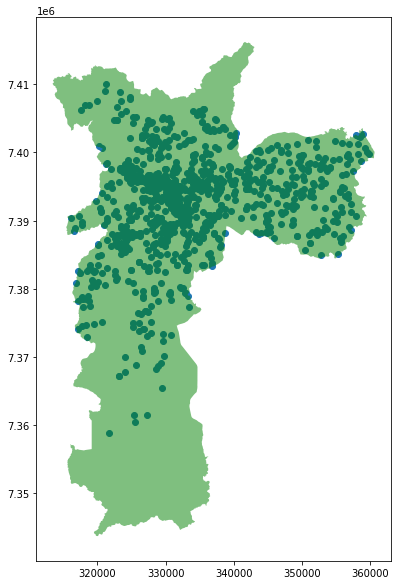

In [27]:
fig, ax = plt.subplots(1, figsize=(10,10))
geo_prep_to_join(df.sample(1_000), "loc_origem").plot(ax=ax)
df_sp.plot(ax=ax, color="green", alpha=.5)

<AxesSubplot:>

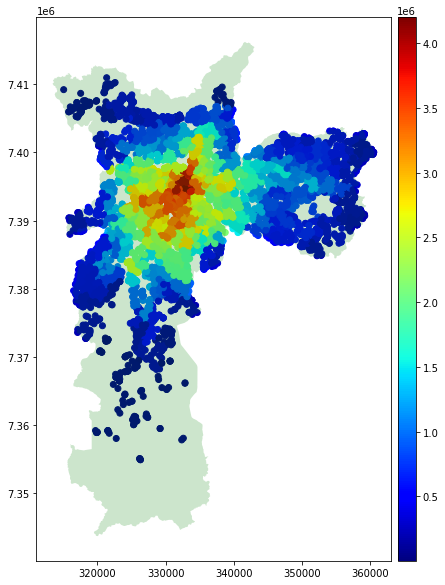

In [64]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_ACC_TP_A_E_60M", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

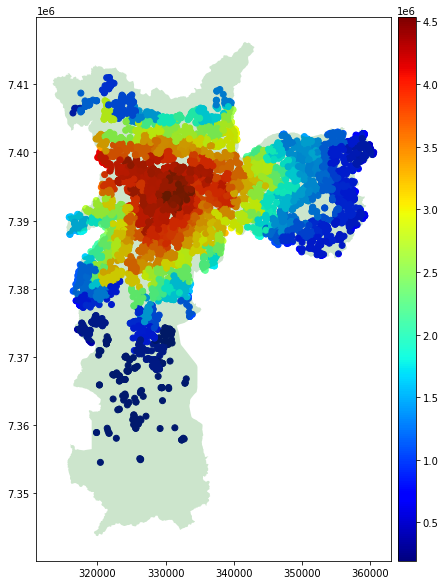

In [63]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_ACC_TI_A_E_60M", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

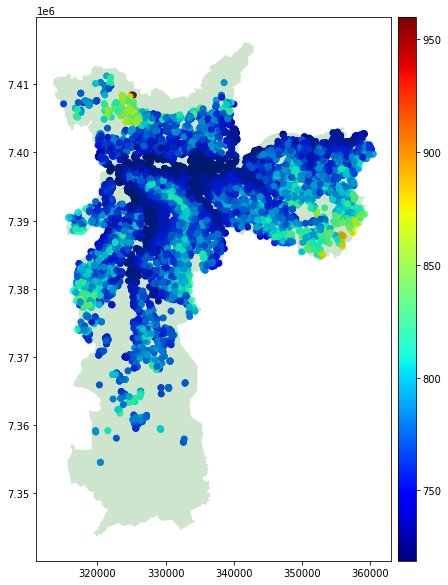

In [62]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_cota", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

In [74]:
df_metro = gpd.read_file("/home/yoshraf/projects/mestrado/data/gis/metro/SAD69-96_SHP_estacaometro_point.shp")
df_metro

,emt_empres,emt_situac,emt_linha,emt_nome,geometry
0,METRO,OPERANDO,VERMELHA,CORINTHIANS-ITAQUERA,POINT (349884.430 7395720.764)
1,METRO,OPERANDO,VERMELHA,ARTUR ALVIM,POINT (348502.644 7395929.882)
2,METRO,OPERANDO,VERMELHA,PATRIARCA,POINT (346777.766 7396920.334)
3,METRO,OPERANDO,VERMELHA,GUILHERMINA-ESPERANÇA,POINT (345227.021 7397116.638)
4,METRO,OPERANDO,VERMELHA,VILA MATILDE,POINT (343753.993 7396811.454)
...,...,...,...,...,...
88,METRO,OPERANDO,LILAS,CAMPO BELO,POINT (328417.735 7386993.338)
89,METRO,OPERANDO,PRATA,SÃO MATEUS,POINT (349391.936 7387987.687)
90,METRO,OPERANDO,PRATA,FAZENDA DA JUTA,POINT (348290.533 7388020.493)
91,METRO,OPERANDO,PRATA,SAPOPEMBA,POINT (346870.129 7387666.243)


<AxesSubplot:>

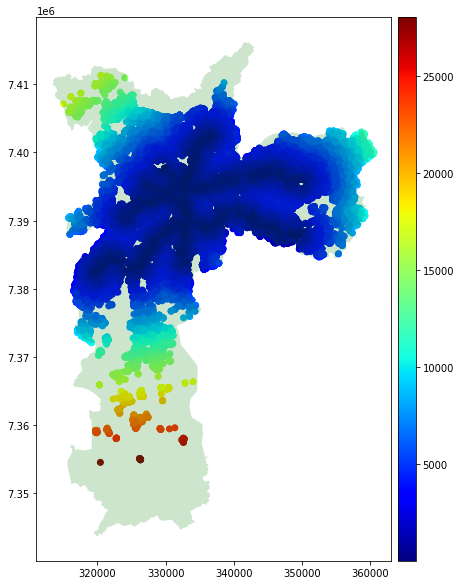

In [79]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(40_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_dist_metro", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)
# df_metro.plot(ax=ax, color="red", alpha =.5)

<AxesSubplot:>

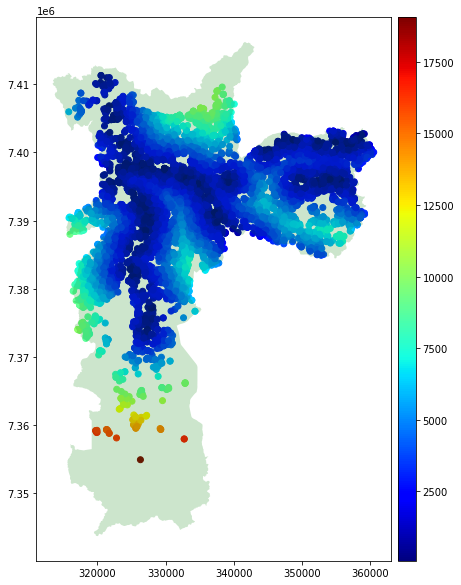

In [70]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_dist_trem", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

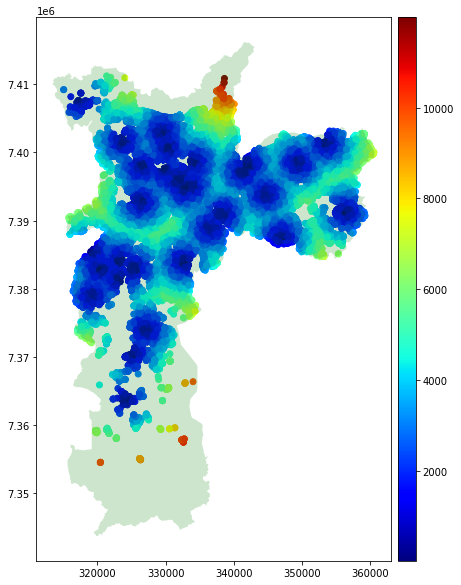

In [72]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(40_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_dist_term", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

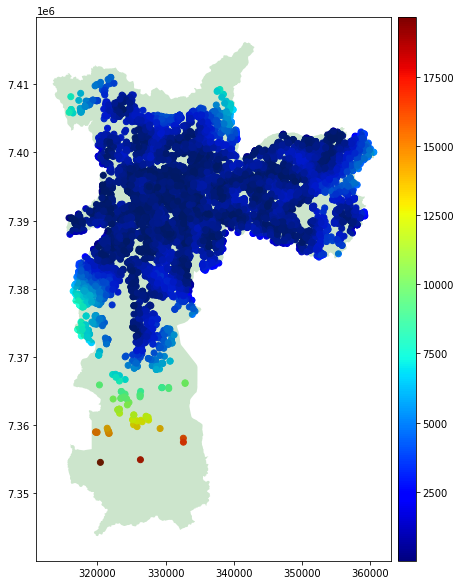

In [58]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_dist_ciclo", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

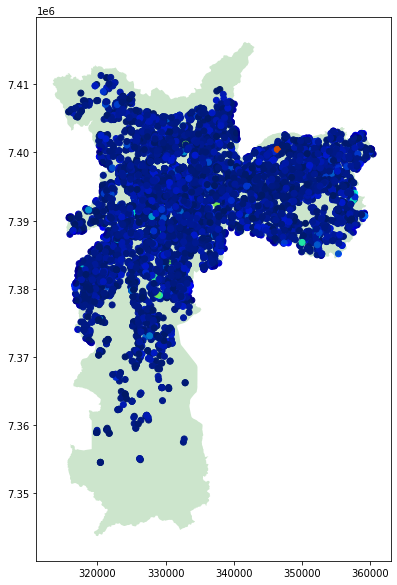

In [43]:
fig, ax = plt.subplots(1, figsize=(10,10))
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_domicilio_count_parada")
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

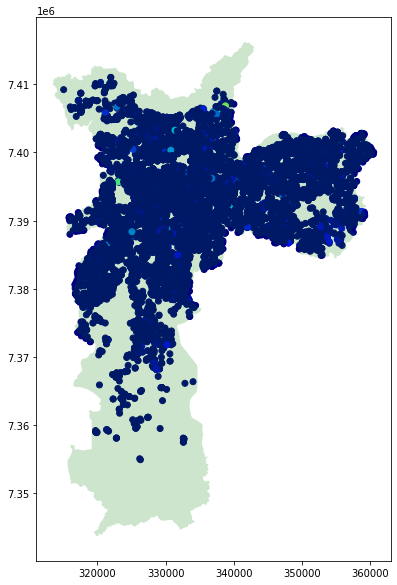

In [44]:
fig, ax = plt.subplots(1, figsize=(10,10))
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_origem_count_ilum_led")
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

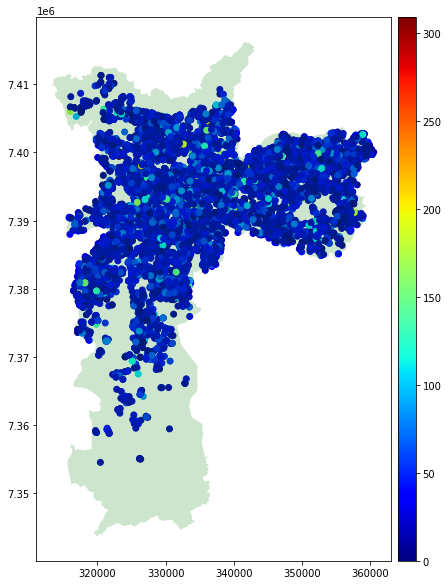

In [57]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(10_000), "loc_domicílio").plot(ax=ax, cmap="jet", column="loc_origem_count_ilum_std", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)

<AxesSubplot:>

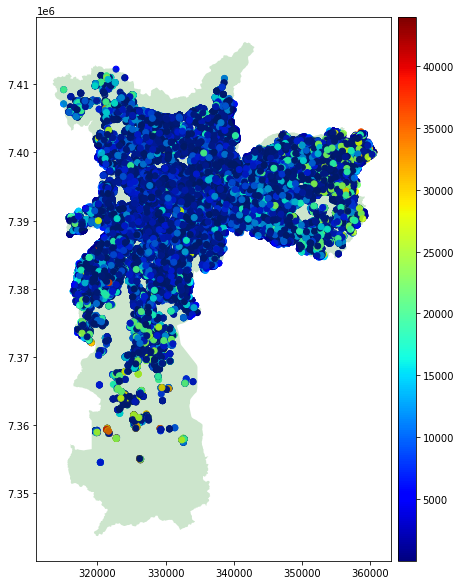

In [71]:
fig, ax = plt.subplots(1, figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
geo_prep_to_join(df.sample(90_000), "loc_origem").plot(ax=ax, cmap="jet", column="dist_od", cax=cax, legend=True)
df_sp.plot(ax=ax, color="green", alpha=.2)